In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tickers=['AMZN','GS','MSFT']
ohlcv_data={}
for ticker in tickers:
    temp=yf.download(ticker,period='9mo')
    temp.dropna(how='any',inplace=True)
    ohlcv_data[ticker]=temp
def MACD(DF,a=12,b=26,c=9):
    df=DF.copy()
    df["ma_fast"]=df["Adj Close"].ewm(span=a, min_periods=a).mean()
    df["ma_slow"]=df["Adj Close"].ewm(span=b, min_periods=b).mean()
    df['macd']=df['ma_fast']-df['ma_slow']
    df['signal']=df['macd'].ewm(span=c,min_periods=c).mean()
    return df.loc[:,['macd','signal']]
for ticker in ohlcv_data:
    ohlcv_data[ticker][['MACD','SIGNAL']]=MACD(ohlcv_data[ticker])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
df=pd.DataFrame
df=ohlcv_data['MSFT']

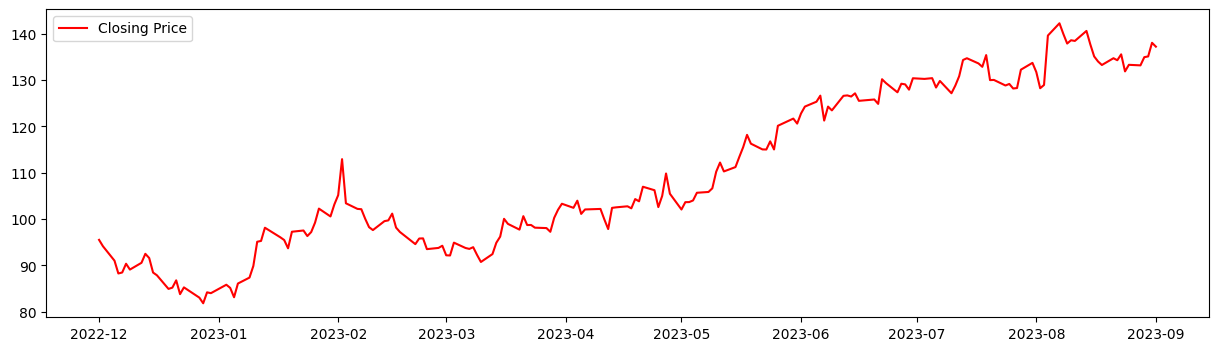

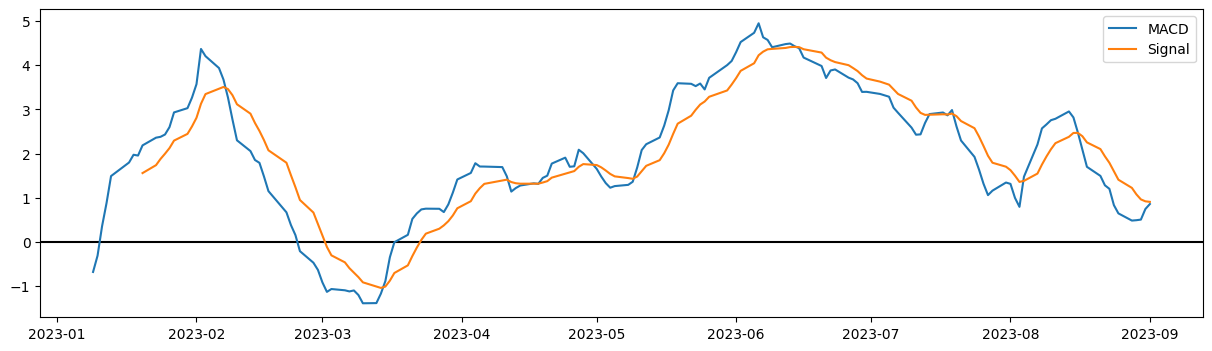

In [13]:
#Closing Price
plt.figure(figsize=(15,4))
plt.plot(df['Close'],label='Closing Price',color='red')
plt.legend()
#MACD & SIGNAL
plt.figure(figsize=(15,4))
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.plot(df["MACD"],label='MACD')
plt.plot(df["SIGNAL"],label='Signal')
plt.legend()

In [6]:
df=pd.DataFrame
df=ohlcv_data['GS']

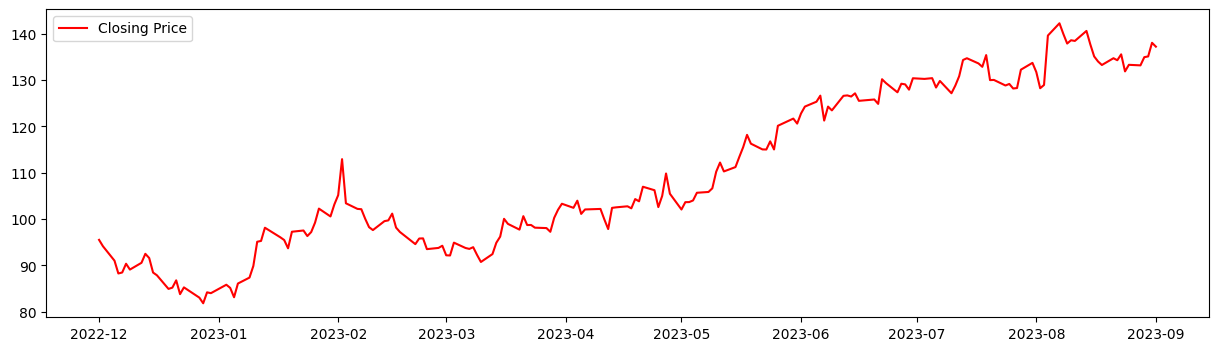

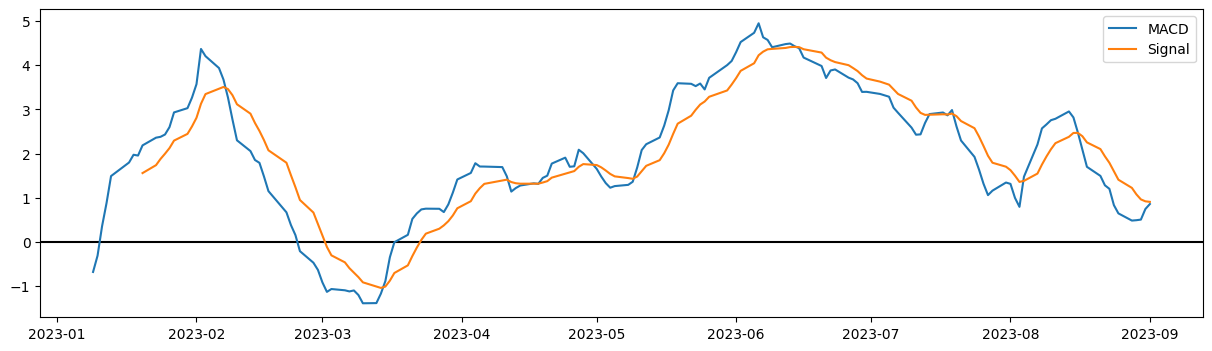

In [14]:
#Closing Price
plt.figure(figsize=(15,4))
plt.plot(df['Close'],label='Closing Price',color='red')
plt.legend()
#MACD & SIGNAL
plt.figure(figsize=(15,4))
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.plot(df["MACD"],label='MACD')
plt.plot(df["SIGNAL"],label='Signal')
plt.legend()

In [8]:
df=pd.DataFrame
df=ohlcv_data['AMZN']

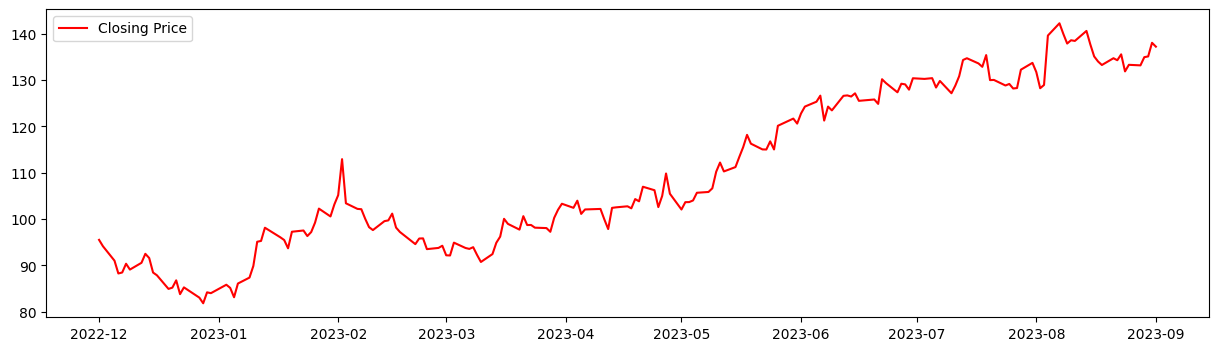

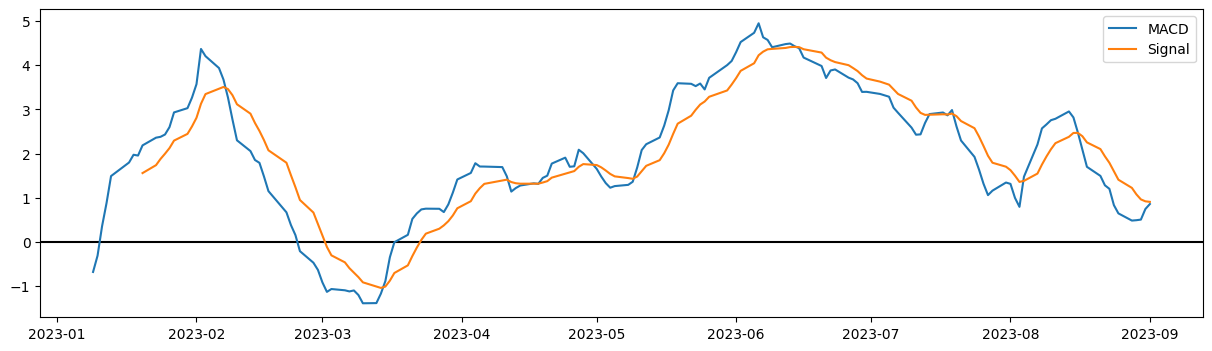

In [15]:
#Closing Price
plt.figure(figsize=(15,4))
plt.plot(df['Close'],label='Closing Price',color='red')
plt.legend()
#MACD & SIGNAL
plt.figure(figsize=(15,4))
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.plot(df["MACD"],label='MACD')
plt.plot(df["SIGNAL"],label='Signal')
plt.legend()